In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13

#### Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330-2023s/blob/master/docs/calendar.html).

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Optional) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Optional) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Optional) [Your takeaway from the course](#15)

## Submission instructions <a name="si"></a>
<hr>
rubric={points:4}

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4. 
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. [Here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members) are some instructions on adding group members in Gradescope.  
- Be sure to follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023s/blob/main/docs/homework_instructions.md).
- Upload the .ipynb file to Gradescope.
- **If the .ipynb file is too big or doesn't render on Gradescope for some reason, also upload a pdf or html in addition to the .ipynb.** 
- Make sure that your plots/output are rendered properly in Gradescope.

## Imports

In [2]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
import random

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

The target is binary which is 1 for default, 0 for non-default. The features are almost nemeric. But for sex and marriage can be binary categorical features and education can be ordinal categorical feature. For those numeric features, I am planning to scale them. In the end, our goal is to predict whether a credic card client will default or not depending on those feature values.

In [3]:
data_frame = pd.read_csv("data/UCI_Credit_Card.csv")
data_frame

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [4]:
random.seed(10)
train_df, test_df = train_test_split(data_frame, test_size=0.3, random_state=123)

<!-- END QUESTION -->

<br><br>

In [5]:
train_df['EDUCATION'].value_counts()

2    9815
1    7433
3    3416
5     210
4      81
6      35
0      10
Name: EDUCATION, dtype: int64

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Type your answer here, replacing this text._

In [6]:
print(train_df.shape)
train_df.info()

(21000, 25)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2      

There are 21000 rows.

In [7]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
train_df.describe().loc['count']

ID                            21000.0
LIMIT_BAL                     21000.0
SEX                           21000.0
EDUCATION                     21000.0
MARRIAGE                      21000.0
AGE                           21000.0
PAY_0                         21000.0
PAY_2                         21000.0
PAY_3                         21000.0
PAY_4                         21000.0
PAY_5                         21000.0
PAY_6                         21000.0
BILL_AMT1                     21000.0
BILL_AMT2                     21000.0
BILL_AMT3                     21000.0
BILL_AMT4                     21000.0
BILL_AMT5                     21000.0
BILL_AMT6                     21000.0
PAY_AMT1                      21000.0
PAY_AMT2                      21000.0
PAY_AMT3                      21000.0
PAY_AMT4                      21000.0
PAY_AMT5                      21000.0
PAY_AMT6                      21000.0
default.payment.next.month    21000.0
Name: count, dtype: float64

There is no missing data from the above information and all features are float or int.

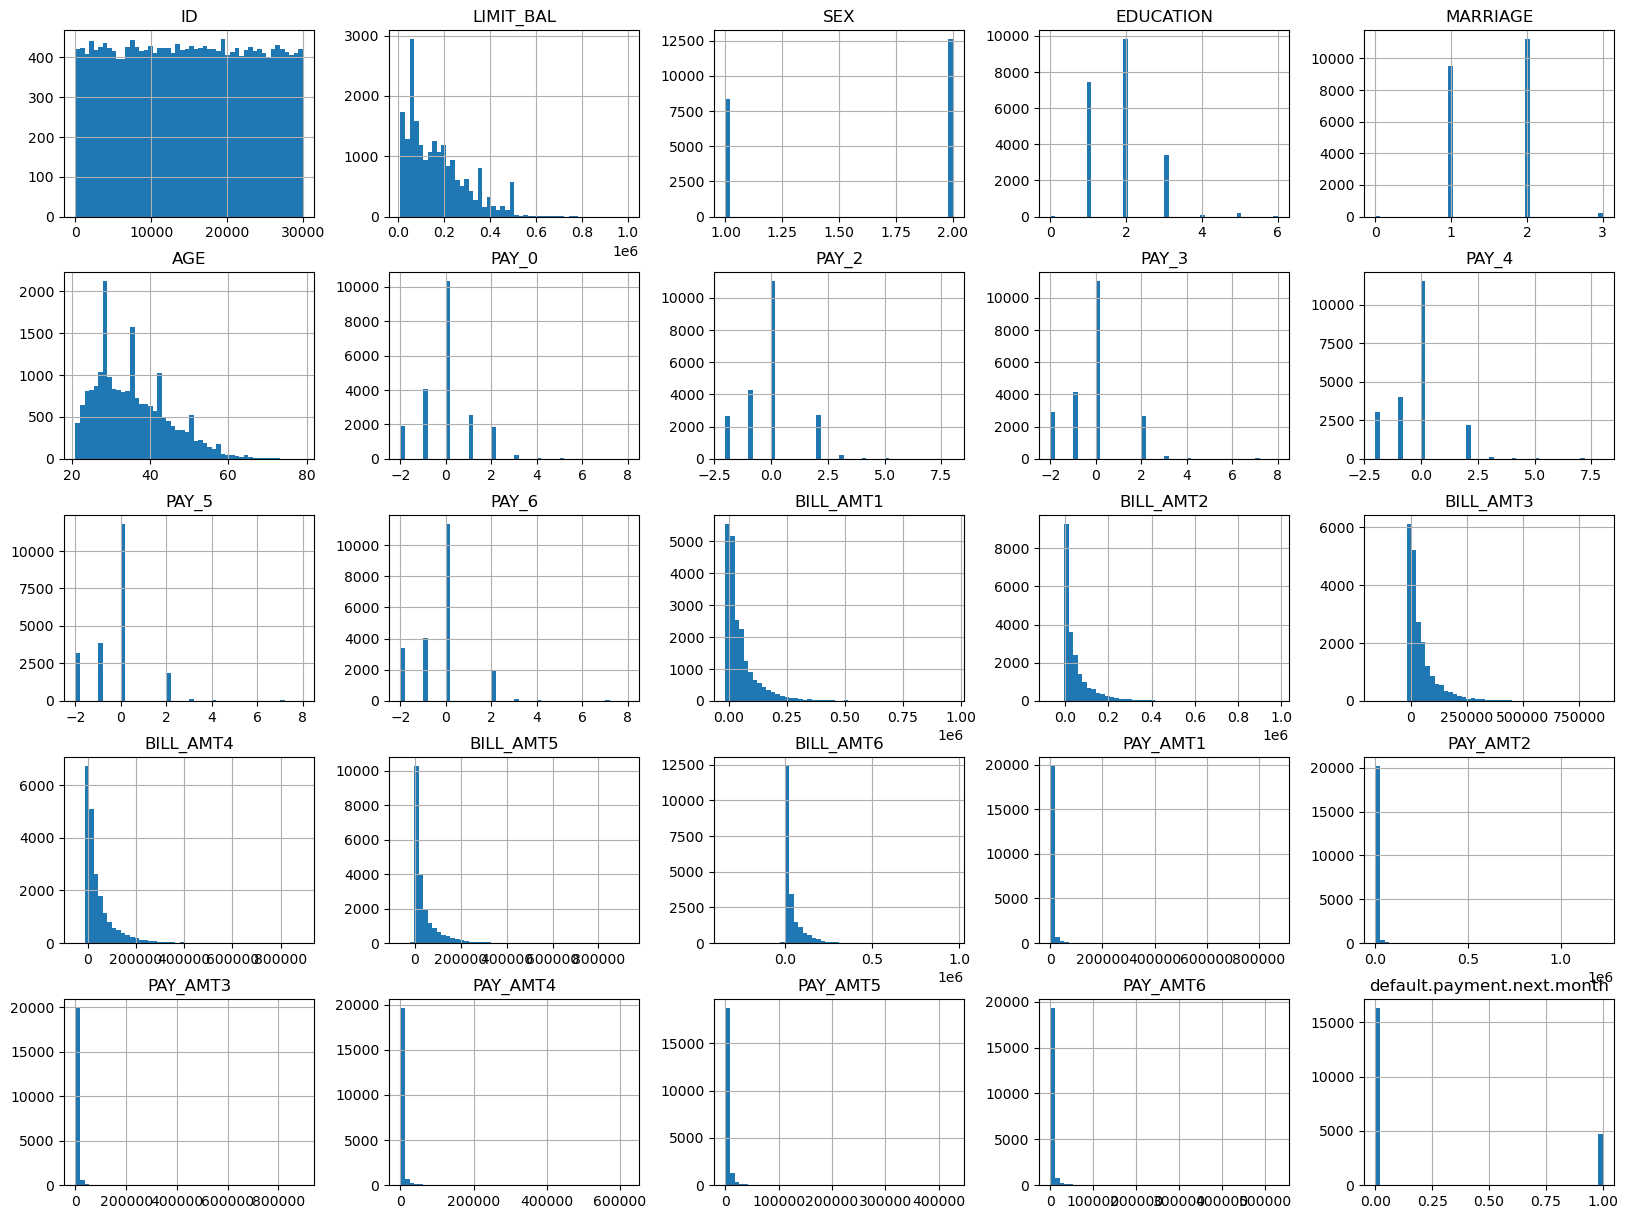

In [9]:
train_df.hist(bins=50, figsize=(20, 15));

The ID is not relevant to our task, maybe we should drop it. And we see some features are mainly focus on 0 but has huge range such as PAY_AMT3

In [10]:
X_train = train_df.drop(columns=["default.payment.next.month"])
y_train = train_df['default.payment.next.month']

X_test = test_df.drop(columns=["default.payment.next.month"])
y_test = test_df['default.payment.next.month']

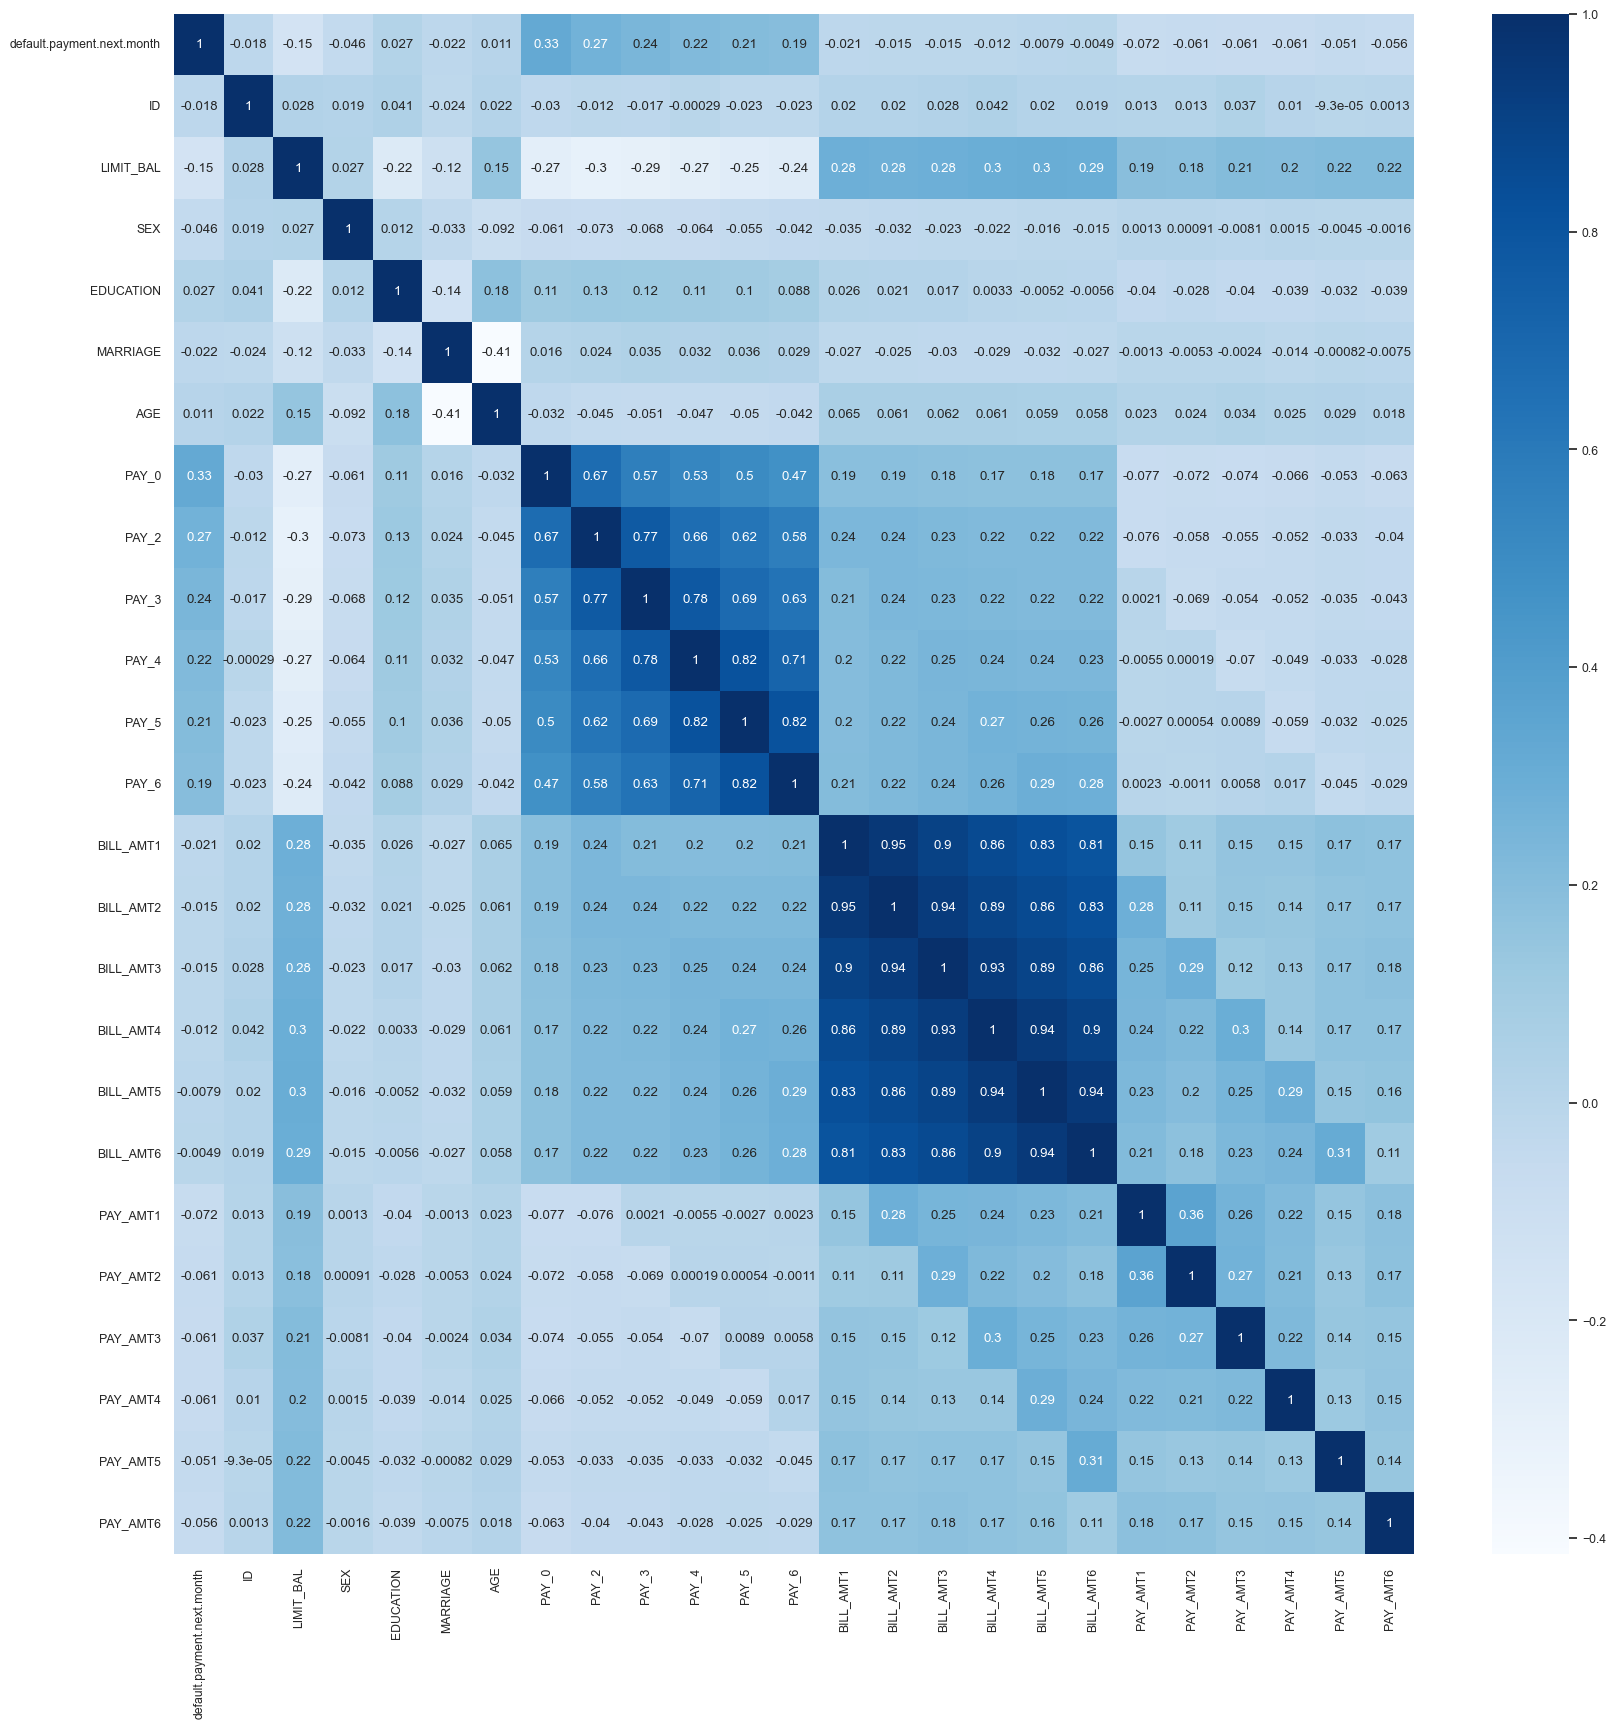

In [11]:
import seaborn as sns
cor = pd.concat((y_train, X_train), axis=1).iloc[:, :25].corr()
plt.figure(figsize=(20, 20))
sns.set(font_scale=.8)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

It looks like PAY_1,2,3,4,5,6 is highly correlated with each other and same as BILL_AMT1,2,3,4,5,6

3. Summarize initial observations about the data:
- we have all numeric features.
- But some features have huge range, we need to scale those numeric feature values.
- we have high correlation in some features.
- we have not unclear data such as education, how does the value in education featuer mean?

In [12]:
train_df["default.payment.next.month"].value_counts(normalize=True)

0    0.776762
1    0.223238
Name: default.payment.next.month, dtype: float64

We have class imbalance. We have 77% non-default classes and 22% default class.
4. we are planning to pick confusion matrix and macro recall to assessment. Because we think both classes are equally important and also false negative is more important than false positive in this case.

In [13]:
...

Ellipsis

In [14]:
...

Ellipsis

In [15]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

We don't think ID is important. We are planning to drop ID firstly.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [16]:
numeric_feats = ['AGE',
                 'LIMIT_BAL', 
                 'PAY_0',
                 'PAY_2',
                 'PAY_3',
                 'PAY_4',
                 'PAY_5',
                 'PAY_6',
                 'BILL_AMT1',
                 'BILL_AMT2',
                 'BILL_AMT3',
                 'BILL_AMT4',
                 'BILL_AMT5',
                 'BILL_AMT6',
                 'PAY_AMT1',
                 'PAY_AMT2',
                 'PAY_AMT3',
                 'PAY_AMT4',
                 'PAY_AMT5',
                 'PAY_AMT6']                   
categorical_feats = ['MARRIAGE']
ordinal_feats = ['EDUCATION']
binary_feats = ['SEX']
drop_feats = ['ID']
# target = 'default.payment.next.month'

In [17]:
ct = make_column_transformer(
    (StandardScaler(), numeric_feats),
    (OneHotEncoder(handle_unknown='ignore'), categorical_feats),
    (OrdinalEncoder(), ordinal_feats),
    (OneHotEncoder(drop='if_binary', dtype=int, sparse=False), binary_feats),
    ("drop", drop_feats)
)
ct

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['AGE', 'LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3',
                                  'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
                                  'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
                                  'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                                  'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
                                  'PAY_AMT5', 'PAY_AMT6']),
                                ('onehotencoder-1',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['MARRIAGE']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['EDUCATION']),
                                ('onehotencoder-2',
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>,
                                               sparse=False),
                                 ['SEX']),
                                ('drop', 'drop', ['ID'])])

In [18]:
X_transformed = ct.fit_transform(X_train)
column_names = (numeric_feats + 
                ct.named_transformers_['onehotencoder-1'].get_feature_names_out().tolist()
                 + ordinal_feats + binary_feats)
column_names

['AGE',
 'LIMIT_BAL',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'MARRIAGE_0',
 'MARRIAGE_1',
 'MARRIAGE_2',
 'MARRIAGE_3',
 'EDUCATION',
 'SEX']

In [19]:
preprocess_df = pd.DataFrame(X_transformed, columns=column_names)
preprocess_df

,AGE,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION,SEX
0,0.054187,1.168355,0.013770,0.114774,0.143483,0.192754,0.232531,0.257059,-0.300665,-0.293394,...,-0.234603,-0.114944,-0.312050,0.097991,0.0,0.0,1.0,0.0,1.0,1.0
1,-0.597108,2.090017,-0.878738,-0.722412,-0.692571,0.192754,0.232531,0.257059,-0.685307,-0.679495,...,6.785208,-0.113778,0.672988,2.562606,0.0,0.0,1.0,0.0,1.0,1.0
2,0.922579,-0.060527,-1.771246,-1.559598,-1.528626,-1.518801,-1.526210,-1.485154,-0.696132,-0.688319,...,-0.289017,-0.309323,-0.312050,-0.289117,0.0,1.0,0.0,0.0,3.0,1.0
3,-0.597108,-0.367748,0.013770,0.114774,0.143483,0.192754,0.232531,0.257059,0.687456,0.752583,...,-0.060260,-0.113843,-0.180384,-0.195169,0.0,1.0,0.0,0.0,2.0,1.0
4,2.008070,-0.905384,0.906278,1.789147,0.143483,0.192754,0.232531,0.257059,-0.040230,-0.031399,...,-0.223720,-0.212134,-0.246381,-0.206319,0.0,0.0,1.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,0.162736,1.629186,0.013770,0.114774,0.143483,0.192754,0.232531,1.999273,-0.513226,-0.486648,...,-0.221435,-0.186216,-0.312050,-0.123521,0.0,1.0,0.0,0.0,2.0,1.0
20996,2.008070,1.475576,0.906278,-1.559598,-1.528626,-0.663024,0.232531,-0.614047,-0.695886,-0.688067,...,-0.148629,-0.309323,0.143760,-0.289117,0.0,1.0,0.0,0.0,1.0,1.0
20997,-0.705657,-0.905384,0.013770,0.114774,0.143483,0.192754,0.232531,0.257059,-0.053288,-0.010446,...,-0.205764,-0.244530,-0.290577,-0.270957,0.0,1.0,0.0,0.0,3.0,1.0
20998,-1.574049,-1.058995,0.013770,0.114774,0.143483,0.192754,0.232531,0.257059,-0.309066,-0.288478,...,-0.180189,-0.194963,-0.290314,-0.289117,0.0,0.0,1.0,0.0,2.0,1.0


In [20]:
#adapted from lecture 3
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation
    """
    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [21]:
from sklearn.metrics import make_scorer, recall_score

target_score = make_scorer(recall_score, average="macro")

In [22]:
results = {}

In [23]:
# adapted from lecture 7
dummy = DummyClassifier()
results["Dummy"] = mean_std_cross_val_scores(dummy, X_train, y_train, return_train_score=True)
pd.DataFrame(results).T
#our first baseline model is dummy classifier because our problem is a classification problem of predicting whether a credit card client will default or not.

,fit_time,score_time,test_score,train_score
Dummy,0.003 (+/- 0.002),0.001 (+/- 0.000),0.777 (+/- 0.000),0.777 (+/- 0.000)


The dummy result shows that we have around 77% are non-default classes and 22% default class.

In [24]:
results["Dummy (recall)"] = mean_std_cross_val_scores(dummy, X_train, y_train, scoring=target_score)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.003 (+/- 0.002),0.001 (+/- 0.000),0.777 (+/- 0.000),0.777 (+/- 0.000)
Dummy (recall),0.003 (+/- 0.001),0.002 (+/- 0.000),0.500 (+/- 0.000),NaN


<!-- END QUESTION -->



<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Type your answer here, replacing this text._

In [71]:
# adapted from lecture 7 and sklear.org
lr = LogisticRegression(max_iter=1000) 
pipe_lr = make_pipeline(ct, lr)
#using the default settings did not converge within the maximum number of iterations. Enorder to fix this we adjusted a hyperparameter that controls the maximum number of iterations
#We have tried to optimize this but it gives warnings so we will just keep it as 1000
results['logistic_regression'] = mean_std_cross_val_scores(pipe_lr, X_train, y_train, return_train_score=True)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.003 (+/- 0.002),0.001 (+/- 0.000),0.777 (+/- 0.000),0.777 (+/- 0.000)
Dummy (recall),0.003 (+/- 0.001),0.002 (+/- 0.000),0.500 (+/- 0.000),NaN
logistic_regression,0.255 (+/- 0.092),0.010 (+/- 0.002),0.810 (+/- 0.002),0.811 (+/- 0.001)
logistic_regression (recall),0.226 (+/- 0.059),0.012 (+/- 0.001),0.608 (+/- 0.006),NaN


In [26]:
results['logistic_regression (recall)'] = mean_std_cross_val_scores(pipe_lr, X_train, y_train, scoring=target_score)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.003 (+/- 0.002),0.001 (+/- 0.000),0.777 (+/- 0.000),0.777 (+/- 0.000)
Dummy (recall),0.003 (+/- 0.001),0.002 (+/- 0.000),0.500 (+/- 0.000),NaN
logistic_regression,0.191 (+/- 0.011),0.010 (+/- 0.000),0.810 (+/- 0.002),0.811 (+/- 0.001)
logistic_regression (recall),0.226 (+/- 0.059),0.012 (+/- 0.001),0.608 (+/- 0.006),NaN


In [91]:
# Carry out hyperparameter tuning to explore different values for the complexity hyperparameter.
from scipy.stats import uniform, loguniform
param_lr = {
    "logisticregression__C": loguniform(1e-3, 1e3), # uniform(0.001, 1e4), # , 
}
search_lr = RandomizedSearchCV(pipe_lr, param_lr, n_iter=100, verbose=1, n_jobs=-1, random_state=321, scoring=target_score)

search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['AGE',
                                                                                'LIMIT_BAL',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6']),
                                                                              ('onehoten...
                                                                               OneHotEncoder(drop='if_binary',
                                                                                             dtype=<class 'int'>,
                                                                                             sparse=False),
                                                                               ['SEX']),
                                                                              ('drop',
                                                                               'drop',
                                                                               ['ID'])])),
                                             ('logisticregression',
                                              LogisticRegression(max_iter=1000))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'logisticregression__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1645fe890>},
                   random_state=321,
                   scoring=make_scorer(recall_score, average=macro), verbose=1)

In [92]:
best_C = search_lr.best_estimator_
pd.DataFrame(search_lr.cv_results_).set_index("rank_test_score").sort_index().T

rank_test_score,1,1,1,1,1,1,1,1,1,1,...,91,92,93,94,95,96,97,98,99,100
mean_fit_time,0.302726,0.299133,0.310801,0.325933,0.312955,0.314864,0.388195,0.318186,0.362418,0.323049,...,0.142638,0.137174,0.119707,0.133705,0.134646,0.129317,0.120892,0.121175,0.119087,0.145488
std_fit_time,0.019427,0.012448,0.037804,0.031351,0.022934,0.01422,0.147691,0.042589,0.0505,0.017609,...,0.010099,0.002434,0.007358,0.004818,0.011422,0.006341,0.004144,0.015394,0.003459,0.005848
mean_score_time,0.024794,0.020244,0.02102,0.023523,0.02186,0.021836,0.022909,0.022119,0.024037,0.023691,...,0.022089,0.023429,0.019544,0.022924,0.02034,0.016911,0.020379,0.022937,0.023449,0.029267
std_score_time,0.003074,0.001464,0.002781,0.002834,0.001601,0.003509,0.002605,0.00298,0.004484,0.004733,...,0.001136,0.001727,0.002589,0.001214,0.003836,0.002971,0.002368,0.002117,0.004453,0.005099
param_logisticregression__C,206.8653,237.485249,346.770715,123.092306,9.832769,125.161389,5.502424,343.247506,125.40087,82.408718,...,0.003926,0.003531,0.003433,0.003352,0.002934,0.002913,0.001934,0.001814,0.001213,0.001101
params,{'logisticregression__C': 206.8653000896466},{'logisticregression__C': 237.48524885953887},{'logisticregression__C': 346.7707152018119},{'logisticregression__C': 123.09230626129515},{'logisticregression__C': 9.832769497987721},{'logisticregression__C': 125.16138890587565},{'logisticregression__C': 5.502424397192849},{'logisticregression__C': 343.24750593189515},{'logisticregression__C': 125.40086993701263},{'logisticregression__C': 82.40871760657014},...,{'logisticregression__C': 0.003926160602289389},{'logisticregression__C': 0.0035306865158065306},{'logisticregression__C': 0.0034325253937626606},{'logisticregression__C': 0.0033524150394419003},{'logisticregression__C': 0.002934094871595622},{'logisticregression__C': 0.00291323571652645},{'logisticregression__C': 0.0019342099065825886},{'logisticregression__C': 0.0018142238491379852},{'logisticregression__C': 0.0012129848341722832},{'logisticregression__C': 0.0011006600276205214}
split0_test_score,0.610304,0.610304,0.610304,0.610304,0.610304,0.610304,0.610304,0.610304,0.610304,0.610304,...,0.599954,0.598126,0.598126,0.597059,0.595078,0.595078,0.588754,0.587153,0.580755,0.579307
split1_test_score,0.609395,0.609395,0.609395,0.609395,0.609395,0.609395,0.609395,0.609395,0.609395,0.609395,...,0.5982,0.596219,0.596219,0.596219,0.593171,0.593171,0.589974,0.588754,0.582356,0.581215
split2_test_score,0.610179,0.610179,0.610179,0.610179,0.610179,0.610179,0.610179,0.610179,0.610179,0.610179,...,0.599385,0.599538,0.599692,0.599312,0.598246,0.598246,0.589797,0.587818,0.578916,0.578843
split3_test_score,0.613457,0.613457,0.613457,0.613457,0.613457,0.613457,0.613457,0.613457,0.613457,0.613457,...,0.597246,0.5958,0.5958,0.595267,0.594508,0.593974,0.587278,0.587278,0.581955,0.579443


From the dataframe above, it shows that the best C for this model is 206.8 . For convienient, We will chose C=200 as best hyperparameter.

In [94]:
best_lr = LogisticRegression(max_iter=1000, C=200) 
best_pipe_lr = make_pipeline(ct, best_lr)
results['logistic_regression (Best C)'] = mean_std_cross_val_scores(best_pipe_lr, X_train, y_train, scoring=target_score)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.003 (+/- 0.002),0.001 (+/- 0.000),0.777 (+/- 0.000),0.777 (+/- 0.000)
Dummy (recall),0.003 (+/- 0.001),0.002 (+/- 0.000),0.500 (+/- 0.000),NaN
logistic_regression,0.255 (+/- 0.092),0.010 (+/- 0.002),0.810 (+/- 0.002),0.811 (+/- 0.001)
logistic_regression (recall),0.226 (+/- 0.059),0.012 (+/- 0.001),0.608 (+/- 0.006),NaN
logistic_regression (Best C),0.127 (+/- 0.040),0.012 (+/- 0.002),0.608 (+/- 0.006),NaN


It looks like there are not much difference between default C and the best C. They are all 0.608

In [75]:
# adapted from lecture 7
# we can also see intercept that was learned by the baseline model
pipe_lr.fit(X_train, y_train)
print("Model weights: %s" % (pipe_lr.named_steps["logisticregression"].coef_))  # these are the learned weights
print("Model intercept: %s" % (pipe_lr.named_steps["logisticregression"].intercept_))  # this is the bias term
data = {"features":preprocess_df.columns, "coefficients": pipe_lr.named_steps["logisticregression"].coef_[0]}
pd.DataFrame(data)

Model weights: [[ 0.04356463 -0.06368626  0.63925997  0.08841442  0.11437435  0.00259341
   0.04082776  0.04372349 -0.41599036  0.1500249   0.0644223   0.00886739
   0.08747877  0.00713826 -0.23146998 -0.19081612 -0.12081014 -0.11320686
  -0.02194959 -0.04974352 -0.48726438  0.22554855  0.0386672   0.20640814
  -0.10211205 -0.14409696]]
Model intercept: [-1.30415201]


,features,coefficients
0,AGE,0.043565
1,LIMIT_BAL,-0.063686
2,PAY_0,0.639260
3,PAY_2,0.088414
4,PAY_3,0.114374
5,PAY_4,0.002593
6,PAY_5,0.040828
7,PAY_6,0.043723
8,BILL_AMT1,-0.415990
9,BILL_AMT2,0.150025


##### interpret coefficients:
Some interesting coefficients here age. Notice that we are predicting for credit card default so this positive coefficient is telling us increasing in age will slightly increase chances of default which is a bit counter intuitive because many people could consider young people to have less wealth and less care thus more likely to default. LIMIT_BAL is amount of given credit. In general, people who have more savings, income and history are granted more credits so this coefficient aligns with our judgment. The series of pay are positive because these pays are ordered by payment delay, so people who would delay payment more are more likely going to default. Interestingly, based on the coefficients, married people MARRIAGE_1 are more likely going to default than people with single status MARRIAGE_2 and being female (higher number in sex) means less likely to default. Lastly, being higher in education means less likely to default with a large coefficient (an important factor like sex,marriage,early payment and payment amount).

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Type your answer here, replacing this text._

In [29]:
...

Ellipsis

In [30]:
...

Ellipsis

In [31]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Type your answer here, replacing this text._

In [32]:
...

Ellipsis

In [33]:
...

Ellipsis

In [34]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Type your answer here, replacing this text._

In [35]:
# model 1 Dummy classifier: code based on lecture 8 and sklearn.org dummy classifier
dummy_param_grid = {'strategy': ['most_frequent', 'stratified', 'uniform']}  
#setting up grid for grid search,did not include constant because we need to pick a number or else there is error
scores_dict = {'strategy': [], 'mean_train_score': [], 'mean_cv_score': []}  #creat dictionary item to store results

dummy_model = DummyClassifier() #our model

for s in dummy_param_grid["strategy"]:
    dummy_model.set_params(strategy=s) #strategy
    GridSearchCV(dummy_model, dummy_param_grid,scoring='accuracy') #grid search
    dummy_grid_search.fit(X_transformed, y_train) #fit
    scores = cross_validate(dummy_model, X_transformed, y_train, return_train_score=True)
    mean_train_score = scores["train_score"].mean() # we are only taking mean scores for cross validation here because cv scores should not be that different for dummy
    mean_cv_score = scores["test_score"].mean()
    
    scores_dict['strategy'].append(s)
    scores_dict['mean_train_score'].append(mean_train_score)
    scores_dict['mean_cv_score'].append(mean_cv_score)

results_df = pd.DataFrame(scores_dict)
results_df

#we can see here that our model tell us the best strategy is 'most frequent'

NameError: name 'dummy_grid_search' is not defined

In [ ]:
# model 2 logistic regression: code based on lesture 7, lecture 8
lr_param_grid = {"C": 10.0 ** np.arange(-4, 6, 1)} #setting up grid for gridsearch
results_dict = {"C": [], "mean_train_score": [], "mean_cv_score": []} #our result are here

lr_model = LogisticRegression(max_iter=1000) #our model

lr_grid_search = GridSearchCV(lr_model, lr_param_grid)
lr_grid_search.fit(X_transformed, y_train)

for C in lr_param_grid["C"]:
    lr_model.set_params(C=C)
    scores = cross_validate(lr_model, X_transformed, y_train, return_train_score=True) # perform cross-validation
    mean_train_score = scores["train_score"].mean()
    mean_cv_score = scores["test_score"].mean()
    
    results_dict["C"].append(C)
    results_dict["mean_train_score"].append(mean_train_score)
    results_dict["mean_cv_score"].append(mean_cv_score)

results_df = pd.DataFrame(results_dict)
best_score_index = results_df['mean_cv_score'].argmax()
print(best_score_index)
best_score = results_df.loc[best_score_index, 'mean_cv_score']
print(best_score)
best_parameters = results_df.loc[best_score_index, 'C']
print(best_parameters)
results_df

5
0.8098095238095239
10.0


,C,mean_train_score,mean_cv_score
0,0.0001,0.778917,0.778857
1,0.0010,0.800548,0.800476
2,0.0100,0.809083,0.808238
3,0.1000,0.810250,0.809619
4,1.0000,0.810560,0.809714
5,10.0000,0.810548,0.809810
6,100.0000,0.810560,0.809810
7,1000.0000,0.810571,0.809810
8,10000.0000,0.810571,0.809810
9,100000.0000,0.810571,0.809762


In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! Have a great weekend! 

![](img/eva-well-done.png)